# Objective
We will be working on a dataset that has sales prices of houses in King County. As a data scientist, you are given a responsibility to create a machine learning model that would predict the sales price for each house in future based on certain input variables. The target variable in this dataset is 'price' and you are given a new unseen test dataset on which you will have to predict price of each house.

Dataset
You can see the dataset here

To load the dataset in your jupyter notebook, use the below command:

import pandas as pd
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')
Data Description
In this dataset the sales price of houses in King County (Seattle) are present. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

price: price of the house. This is our target variable.
bedrooms: Number of bedrooms
bathroooms: Number of bathrooms
sqft_living: Square footage of house
sqft_lot: Square footage of lot
floors: Number of floors/ Level
waterfront: 1 = Waterfront view; 0 = No waterfront view
view: 1 = House been viewed; 0 = House has not been viewed
condition: 1 indicates worn out property and 5 excellent
grade: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent
sqft_above: Square footage of house apart from basement
sqft_below: Square footage of the basement
yr_built: Year of house built
yr_renovated: Year of house renovated
zipcode: Zip code
lat: Latitude coordination
long: Longitude coordination
sqft_living15: Square footage of house in 2015 (implies-- some renovations)
sqft_lot15: Square footage of lot in 2015 (implies-- some renovations)
Evaluation Criteria
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the predicted value of your model and true value of sales price on the unseen new test dataset mentioned under submission guidelines below.

Steps to Build Your Model
Create a linear regression model for target variable 'price'. You can follow the general machine learning model steps as listed under:

Load the necessary libraries such as pandas, numpy, scikit-learn and more if any

Load your dataset and perform exploratory data analysis to identify patterns in the dataset

You may fill mssing values if any (use mode for categorical column and mean/median for numerical columns). If there are no missing values, you may skip this step
Separate Input Variables and Target variable

Split the dataset 'house_data' into train set and test dataset. Now what is this 'house_data'? - don't worry, just scroll up to dataset section above, we have declared the name of our dataset as house_data.
Build a Linear Regression Model
Predict the target variable for your own test dataset created in step 5 and check the model performance
Now, use your model to predict the house price on new test dataset given under the "Submission Guidelines" section.
Once you submit your predictions in precribed format given under "Submission Guidelines" section, you will get a score based on your model performance.
Not happy with your model performance? It is alright, you can try to optimise the model further to improve the performance of your model and submit your predictions again.
Submission Guidelines & Help Documentation
Load the new unseen test data (name it as 'test_new'). You can load the data using the below command.

test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')
Here the price column is deliberately not there as you need to predict it.

With the model you have built from the earlier section, predict the target variable 'price' on the new unseen test data that you loaded in step 1. Store the predicted values in a variable 'price'

Save prediction result using the guidelines given under "how to save prediction file?" section.

Submission: Go to solve tab and submit your predicted values for price variable. The predicted values for price must be put in comma separated inside the square brackets of the following command prediction = [] . Once done, click on 'run' button to get your result. Further, if you want to get your rank, click on the small submission icon which is in the form of tick mark. A detailed instructional video will be uploaded shortly.

How to save prediction file?

Please follow the steps given in the following notebook link: https://bit.ly/LinearReg_Demo_DPhi

Help links to make submission
For getting comma-separated values, use: https://delim.co/
If you are facing challenges to build their model refer to this: https://youtu.be/nsYxsKvtU4A
If you have built models and want to submit on the learning platform, refer this: https://youtu.be/XC3ZxHq5s9I
Acknowledgements:
This dataset earlier appeared on Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction) and we are using it for learning purpose.

  



In [1]:
import pandas as pd
import numpy as np
# libraries for numerical


# libraries for machine learning
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
house_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_data.csv')

In [3]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.661300e+04,16613.000000,16613.000000,16613.000000,1.661300e+04,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000,16613.000000
mean,5.335161e+05,3.365918,2.062090,2053.860531,1.573761e+04,1.432553,0.007946,0.244026,3.449708,7.592608,1750.210859,303.649672,1967.297418,89.855234,98078.162283,47.560026,-122.215380,1974.793776,13287.334256
std,3.665165e+05,0.937185,0.758786,904.438391,4.195449e+04,0.509669,0.088786,0.781695,0.666582,1.168420,804.771068,450.701536,27.936716,413.846846,54.152178,0.139708,0.138657,673.022438,27456.421787
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1414.000000,5.454000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98033.000000,47.464600,-122.327000,1490.000000,5421.000000
50%,4.470000e+05,3.000000,2.000000,1900.000000,7.902000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573000,-122.231000,1830.000000,7823.000000
75%,6.387000e+05,4.000000,2.500000,2500.000000,1.107000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2140.000000,600.000000,1990.000000,0.000000,98118.000000,47.679000,-122.127000,2330.000000,10327.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,871200.000000


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16613 entries, 0 to 16612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16613 non-null  float64
 1   bedrooms       16613 non-null  int64  
 2   bathrooms      16613 non-null  float64
 3   sqft_living    16613 non-null  int64  
 4   sqft_lot       16613 non-null  int64  
 5   floors         16613 non-null  float64
 6   waterfront     16613 non-null  int64  
 7   view           16613 non-null  int64  
 8   condition      16613 non-null  int64  
 9   grade          16613 non-null  int64  
 10  sqft_above     16613 non-null  int64  
 11  sqft_basement  16613 non-null  int64  
 12  yr_built       16613 non-null  int64  
 13  yr_renovated   16613 non-null  int64  
 14  zipcode        16613 non-null  int64  
 15  lat            16613 non-null  float64
 16  long           16613 non-null  float64
 17  sqft_living15  16613 non-null  int64  
 18  sqft_l

In [7]:
house_data.shape

(16613, 19)

In [8]:
X = house_data.drop('price', axis = 1)
y = house_data['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
pred_train = model.predict(X_train)

In [12]:
# Root Mean Squarred Error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, pred_train))

206060.77956697572

In [13]:
pred = model.predict(X_test)

In [14]:
# Root Mean Squarred Error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

188089.38497918833

In [15]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train) 

LinearRegression()

In [16]:
y_pred = linear_regressor.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

188089.38497918833

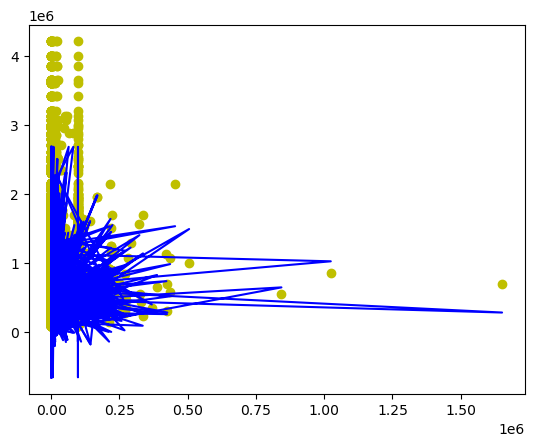

In [18]:
plt.plot(X_test, y_test,'yo')
plt.plot(X_test, y_pred, color='blue')
plt.show()

In [19]:
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

125201.00878283348
35377616741.84932
188089.38497918833


In [19]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/kc_house_data/kc_house_new_test_data.csv')

In [20]:
test_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5,3.25,5210,35765,2.5,0,4,5,10,4940,270,1911,0,98136,47.5463,-122.397,2590,10250
1,5,2.00,2800,17788,1.0,0,0,4,8,1400,1400,1963,0,98033,47.6719,-122.163,1760,18282
2,4,2.25,2060,44431,2.0,0,0,3,7,2060,0,1988,0,98077,47.7440,-122.046,2160,45657
3,5,2.00,2360,19899,1.0,0,0,4,7,2360,0,1968,0,98010,47.3299,-122.046,1860,19998
4,4,2.50,2370,6557,2.0,0,0,3,9,2370,0,1998,0,98042,47.4230,-122.155,2370,7378


In [21]:
test_new.shape

(4999, 18)

In [22]:
test_new.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
price = model.predict(test_new)

In [28]:
res = pd.DataFrame(price)
res.index = test_new.index # its important for comparison
res.columns = ["price"]
res.to_csv("prediction_results_HP.csv")    

In [40]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(price)
res.index = test_new.index # its important for comparison
res.columns = ["price"]

# To download the csv file locally
res.to_csv('prediction_results_HP.csv')         

In [42]:
d=pd.read_csv("prediction_results_HP.csv")

In [47]:
d['price']

0       1.781037e+06
1       6.945421e+05
2       4.498564e+05
3       3.486220e+05
4       5.477130e+05
            ...     
4994    4.341188e+05
4995    4.092511e+05
4996    1.108230e+05
4997    3.602393e+05
4998    1.139008e+05
Name: price, Length: 4999, dtype: float64

In [49]:
from IPython.display import FileLink, FileLinks